In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read embeddings data

In [3]:
df = pd.read_csv('embeddings.csv')
print('Number of papers:',df.shape[0])
df.head()

Number of papers: 1048


,paperId,title,abstract,embedding
0,b1452907e85f6e4d315ca8c61a1393403a533b2f,leading the way a new model for data science e...,"Addressing the data skills gap, namely the sup...","{'model': 'specter@v0.1.1', 'vector': [2.09241..."
1,4b4fdc82593e3c59a8f18fb7ab4e06ece0af3cf6,reshape a method to teach data ethics for data...,Data has become central to the technologies an...,"{'model': 'specter@v0.1.1', 'vector': [-0.0348..."
2,41cf91ee13a1d15983ede066ddf6b67cc94a41f4,the role of academia in data science education,As the demand for data scientists continues to...,"{'model': 'specter@v0.1.1', 'vector': [-1.1852..."
3,5d090dbeae225383d56ee7ac17b611adeb21c3e3,data science education curriculum and pedagogy,Data science is a new field of research focuse...,"{'model': 'specter@v0.1.1', 'vector': [2.41479..."
4,92a7cd8186400b382463dea25b2c0797cac8fbd5,introducing gaise ii a guideline for precolleg...,Column Editor’s note: In this column Anna Barg...,"{'model': 'specter@v0.1.1', 'vector': [-2.9022..."


In [4]:
embedding_df = df['embedding'].apply(lambda x:x[x.find('[')+1:x.find(']')]).str.split(',', expand=True).astype(float)

# Generate SSE graph and size of clusters

In [5]:
res=pd.DataFrame(columns=['inertia','min_cluster_size'])

for n_clusters in range(2,51):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=8000, n_init=10)
  kmeans.fit(embedding_df)
  res.loc[n_clusters]={'inertia':kmeans.inertia_,'min_cluster_size':min(pd.Series(kmeans.labels_).value_counts())}

  print('n=',n_clusters,'inertia=',kmeans.inertia_,'min cluster size=',min(pd.Series(kmeans.labels_).value_counts()))

n= 2 inertia= 2933303.9908725666 min cluster size= 392
n= 3 inertia= 2822614.1686253417 min cluster size= 277
n= 4 inertia= 2746156.2668182286 min cluster size= 178
n= 5 inertia= 2692982.9583336683 min cluster size= 130
n= 6 inertia= 2642903.358813969 min cluster size= 73
n= 7 inertia= 2604387.6228867024 min cluster size= 75
n= 8 inertia= 2565625.06112203 min cluster size= 71
n= 9 inertia= 2539693.7274997653 min cluster size= 66
n= 10 inertia= 2509787.697099152 min cluster size= 64
n= 11 inertia= 2479503.3543711947 min cluster size= 35
n= 12 inertia= 2456005.5394579954 min cluster size= 33
n= 13 inertia= 2448159.696421042 min cluster size= 32
n= 14 inertia= 2417806.1309725177 min cluster size= 28
n= 15 inertia= 2401351.955142998 min cluster size= 28
n= 16 inertia= 2395385.5553780883 min cluster size= 23
n= 17 inertia= 2372746.837489878 min cluster size= 21
n= 18 inertia= 2358852.9330760627 min cluster size= 19
n= 19 inertia= 2351021.384731712 min cluster size= 29
n= 20 inertia= 2342550

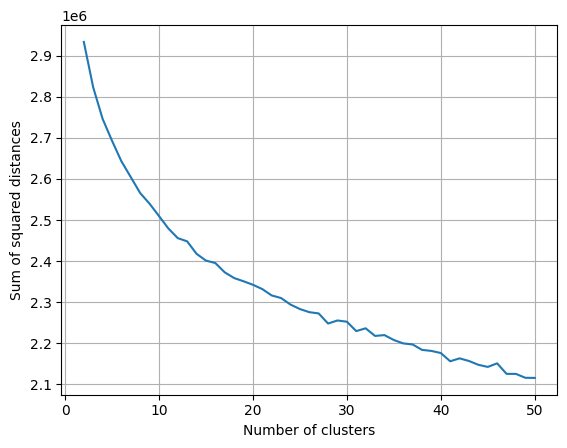

In [6]:
plt.plot(res.index,res['inertia'])
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid()

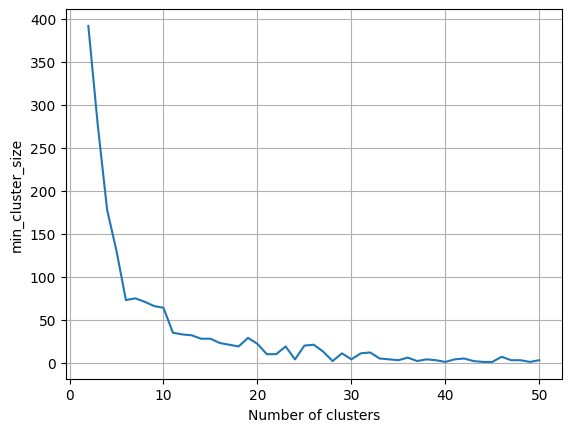

In [7]:
plt.plot(res.index,res['min_cluster_size'])
plt.xlabel('Number of clusters')
plt.ylabel('min_cluster_size')
plt.grid()

# Clustering

In [8]:
n_clusters = 26

In [9]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=8000, n_init=10)
kmeans.fit(embedding_df)

KMeans(max_iter=8000, n_clusters=26, n_init=10, random_state=0)

In [10]:
df['cluster'] = kmeans.labels_

In [11]:
embedding = embedding_df.to_numpy()
df['dist'] = [np.linalg.norm(embedding[i] - kmeans.cluster_centers_[df['cluster'][i]]) for i in range(df.shape[0])]

In [12]:
df.sort_values(['cluster','dist'],inplace=True)

In [16]:
df[['paperId','cluster','dist','title','abstract']].to_csv('clustering.csv',index=False)